In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, asc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latestdate = session.query(Measurement.date).order_by(desc(Measurement.date)).first().date
print(latestdate)


2017-08-23


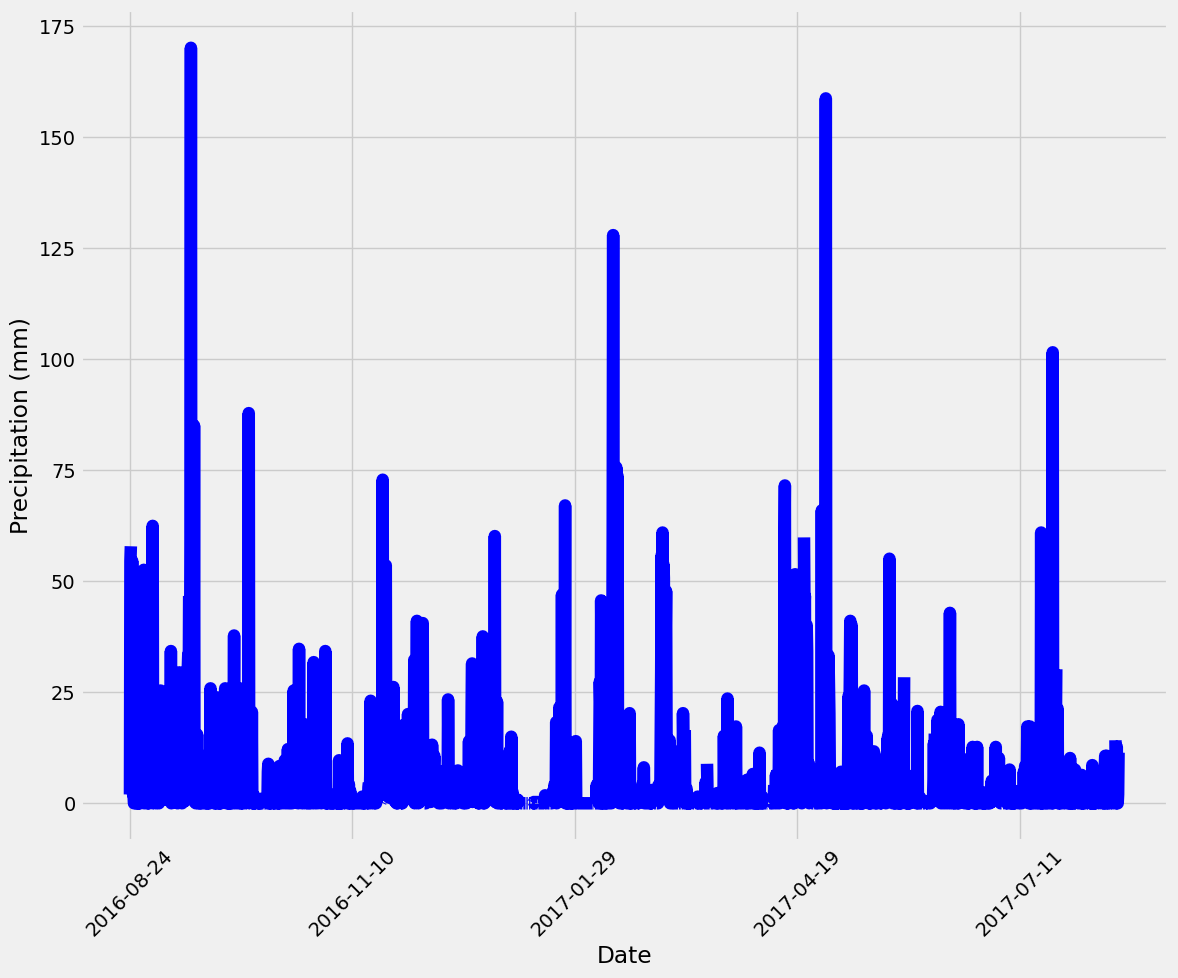

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latestdate = session.query(Measurement.date).order_by(desc(Measurement.date)).first().date
# Calculate the date one year from the last date in data set.
oneyearago = dt.datetime.strptime(latestdate, '%Y-%m-%d') - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
prec_scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.asc()).filter(Measurement.date>=oneyearago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precscores=pd.DataFrame(prec_scores, columns =["Date","Precipitation"])
df_precscores.set_index("Date",inplace=True)

# Sort the dataframe by date
df_precscores.sort_values(by=["Date"], ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
df_precscores.plot(color='b',figsize=(12,10),legend=False,linewidth=9.0,grid=True, rot =45)
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precscores.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = stations[0][0]
print(f'The station with the greatest number of observations is {most_active}.')
temp_info = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()
print(f'The {most_active} stations min, max and average temperatures are {temp_info}.' )

The station with the greatest number of observations is USC00519281.
The USC00519281 stations min, max and average temperatures are [(12.2, 29.4, 22.03582251082252)].


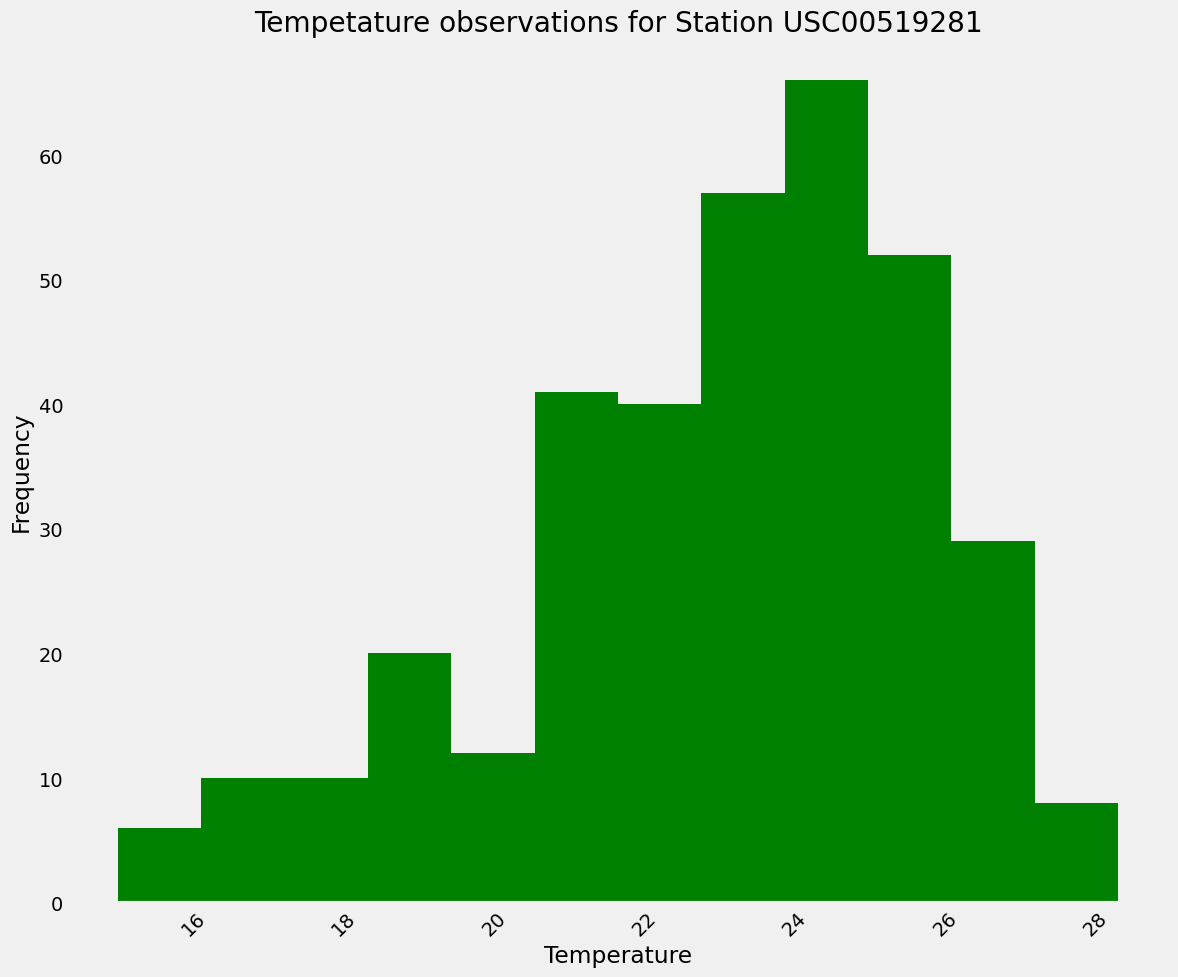

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
MA_Station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date>=oneyearago).filter(Measurement.station == most_active).all()
df_MA_Station=pd.DataFrame(MA_Station)

df_MA_Station.set_index("station",inplace=True)
#df_MA_Station.sort_values(by=["Date"], ascending = True)
df_MA_Station.head()

df_MA_Station.plot.hist(bins=12,color='g',figsize=(12,10),legend=False,linewidth=9.0,grid=False, rot =45)
plt.title(f"Tempetature observations for Station "+ most_active)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()